# Customer segmentation and market basket

intro

<h3 style="color:Peru;"> Problem Statement </h3>

The dataset is ....
**The main objective is....**

<h3 style="color:Peru;"> Import Required Libraries </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import datetime
import math
import sklearn.metrics as metrics

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

<h3 style="color:Peru;"> Load Dataset </h3>

In [2]:
df = pd.read_csv("Online Retail.csv", encoding= 'unicode_escape')

In [3]:
# lets check the first five rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


<h3 style="color:Peru;"> Data Description and Preprocesing </h3>

* InvoiceNo: A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).
* StockCode: Identifier for items contained in an invoice.
* Description: Textual description of each of the stock item.
* Quantity: The quantity of the item purchased.
* InvoiceDate: Date of purchase.
* UnitPrice: Value of each item.
* CustomerID: Identifier for customer making the purchase.
* Country: Country of customer.

In [4]:
# lets check the shape of dataset
df.shape

(541909, 8)

In [5]:
# Let's get an overview of features datatype
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df.CustomerID = df.CustomerID.astype('Int64')

In [7]:
# summary statistics
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-01-12 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-10 17:19:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


Note that ........

In [8]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,<NA>,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,<NA>,United Kingdom


In [9]:
df[df['Description']=='Adjust bad debt']
# df=df[~(df['Description']=='Adjust bad debt')]  # removing all orders having Descrption: Adjust bad debt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-12-08 14:50:00,11062.06,<NA>,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,<NA>,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,<NA>,United Kingdom


In [10]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-01-12 11:52:00,0.0,<NA>,United Kingdom
1970,536545,21134,NaN,1,2010-01-12 14:32:00,0.0,<NA>,United Kingdom
1971,536546,22145,NaN,1,2010-01-12 14:33:00,0.0,<NA>,United Kingdom
1972,536547,37509,NaN,1,2010-01-12 14:33:00,0.0,<NA>,United Kingdom
1987,536549,85226A,NaN,1,2010-01-12 14:34:00,0.0,<NA>,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-08-12 10:33:00,0.0,<NA>,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-08-12 13:58:00,0.0,<NA>,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-08-12 13:58:00,0.0,<NA>,United Kingdom
538554,581408,85175,NaN,20,2011-08-12 14:06:00,0.0,<NA>,United Kingdom


In [11]:
df[df['Quantity']<0]  # these are canceled orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-09-12 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12 11:58:00,1.25,17315,United Kingdom


In [12]:
df[(df['UnitPrice']==0) & (df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-01-12 16:50:00,0.0,<NA>,United Kingdom
4347,536764,84952C,NaN,-38,2010-02-12 14:42:00,0.0,<NA>,United Kingdom
7188,536996,22712,NaN,-20,2010-03-12 15:30:00,0.0,<NA>,United Kingdom
7189,536997,22028,NaN,-20,2010-03-12 15:30:00,0.0,<NA>,United Kingdom
7190,536998,85067,NaN,-6,2010-03-12 15:30:00,0.0,<NA>,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-07-12 18:36:00,0.0,<NA>,United Kingdom
535335,581212,22578,lost,-1050,2011-07-12 18:38:00,0.0,<NA>,United Kingdom
535336,581213,22576,check,-30,2011-07-12 18:38:00,0.0,<NA>,United Kingdom
536908,581226,23090,missing,-338,2011-08-12 09:56:00,0.0,<NA>,United Kingdom


In [13]:
df[(df['UnitPrice']==0) & (df['Quantity']>0)].head() # what dose this mean??????????????????????

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-01-12 11:52:00,0.0,<NA>,United Kingdom
1970,536545,21134,NaN,1,2010-01-12 14:32:00,0.0,<NA>,United Kingdom
1971,536546,22145,NaN,1,2010-01-12 14:33:00,0.0,<NA>,United Kingdom
1972,536547,37509,NaN,1,2010-01-12 14:33:00,0.0,<NA>,United Kingdom
1987,536549,85226A,NaN,1,2010-01-12 14:34:00,0.0,<NA>,United Kingdom


In [14]:
df['CustomerID'].isna

<bound method Series.isna of 0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 541909, dtype: Int64>

In [15]:
df=df[~(df.CustomerID.isna())]

In [16]:
df[df['Quantity']<0].head()           # these are return orders [invoice number starts with 'C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548,United Kingdom


In [17]:
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829,406829,406829,406829.000000,406829,406829.000000,406829.000000,406829
unique,22190,3684,3896,NaN,20460,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,542,2077,2070,NaN,543,NaN,NaN,361878
first,NaN,NaN,NaN,NaN,2010-01-12 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-10 17:19:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.061303,NaN,3.460471,15287.690570,NaN
std,NaN,NaN,NaN,248.693370,NaN,69.315162,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13953.000000,NaN


In [18]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-05-12 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-06-01 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-06-01 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-10-02 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


In [19]:
df['amount'] = df.Quantity*df.UnitPrice

In [20]:
df.shape

(406829, 9)

In [21]:
df = df[~df.duplicated()].sort_values(by = ['InvoiceDate','CustomerID'])

In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
394694,570876,23509,MINI PLAYING CARDS FUN FAIR,4,2011-12-10 17:19:00,0.42,16085,United Kingdom,1.68
394695,570876,23048,SET OF 10 LANTERNS FAIRY LIGHT STAR,2,2011-12-10 17:19:00,4.15,16085,United Kingdom,8.30
394696,570876,23503,PLAYING CARDS KEEP CALM & CARRY ON,4,2011-12-10 17:19:00,1.25,16085,United Kingdom,5.00
394697,570876,22696,WICKER WREATH LARGE,3,2011-12-10 17:19:00,1.95,16085,United Kingdom,5.85


In [23]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
amount         0
dtype: int64

### **Visual analysis"**

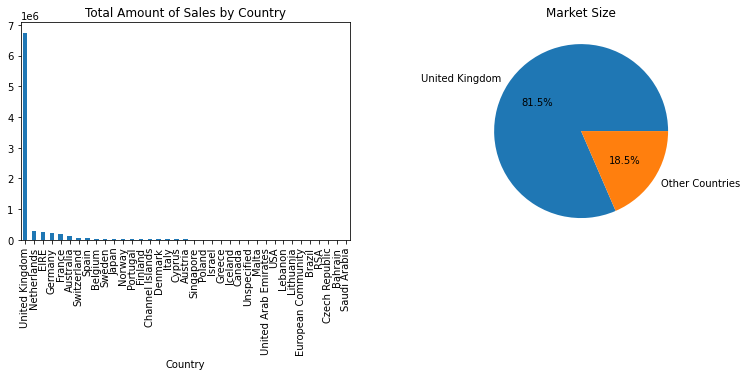

In [24]:
fig = plt.figure(figsize=(13, 4))
f1 = fig.add_subplot(1,2,1)
plot1 = df.groupby(["Country"]).amount.sum().sort_values(ascending = False).plot(kind='bar', title='Total Amount of Sales by Country')
df['Internal'] = df.Country.apply(lambda x: 'United Kingdom' if x=='United Kingdom' else 'Other Countries' )
f2 = fig.add_subplot(1,2,2)
market = df.groupby(["Internal"]).amount.sum().sort_values(ascending = False)
plot2 = plt.pie(market, labels=market.index, autopct='%1.1f%%')
plt.title('Market Size')
plt.show()

We may do market segmentation for United Kingdom & other countries ??????????????????????????

## RFM analysis

Exclude return orders

In [25]:
df=df[~df['Quantity']<0]

Usually, we make use of the last transaction date plus one day. Then, we will construct the recency variable as the number of days before the reference date when a customer last made a purchase.

In [26]:
refrence_date = df.InvoiceDate.max() + datetime.timedelta(days = 1)
print('Reference Date:', refrence_date)

Reference Date: 2011-12-11 17:19:00


### Recency

In [27]:
df['days_since_last_purchase'] = (refrence_date - df.InvoiceDate).astype('timedelta64[D]') # 'D' stands for 1 unit = 1 day
customer_history_df = df[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
customer_history_df

,CustomerID,days_since_last_purchase
0,12346,327.0
1,12347,41.0
2,12348,77.0
3,12349,20.0
4,12350,312.0
...,...,...
4334,18280,161.0
4335,18281,5.0
4336,18282,217.0
4337,18283,11.0


In [28]:
customer_history_df.rename(columns={'days_since_last_purchase':'recency'}, inplace=True)
customer_history_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,4339.0,15299.936852,1721.889758,12346.0,13812.5,15299.0,16778.5,18287.0
recency,4339.0,106.430053,115.075862,1.0,23.0,62.0,162.5,698.0


### frequency

In [29]:
customer_freq = (df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
customer_freq

,CustomerID,frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4334,18280,1
4335,18281,1
4336,18282,2
4337,18283,16


In [30]:
customer_history_df = customer_history_df.merge(customer_freq)

In [31]:
customer_history_df

,CustomerID,recency,frequency
0,12346,327.0,1
1,12347,41.0,7
2,12348,77.0,4
3,12349,20.0,1
4,12350,312.0,1
...,...,...,...
4334,18280,161.0,1
4335,18281,5.0,1
4336,18282,217.0,2
4337,18283,11.0,16


### Monetary

In [32]:
customer_monetary_val = df[['CustomerID', 'amount']].groupby("CustomerID").sum().reset_index()
customer_monetary_val

,CustomerID,amount
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2045.53


In [33]:
customer_history_df = customer_history_df.merge(customer_monetary_val)
customer_history_df.rename(columns={'amount':'monetary'},inplace=True)
customer_history_df

,CustomerID,recency,frequency,monetary
0,12346,327.0,1,77183.60
1,12347,41.0,7,4310.00
2,12348,77.0,4,1797.24
3,12349,20.0,1,1757.55
4,12350,312.0,1,334.40
...,...,...,...,...
4334,18280,161.0,1,180.60
4335,18281,5.0,1,80.82
4336,18282,217.0,2,178.05
4337,18283,11.0,16,2045.53


### Feature Preprocessing

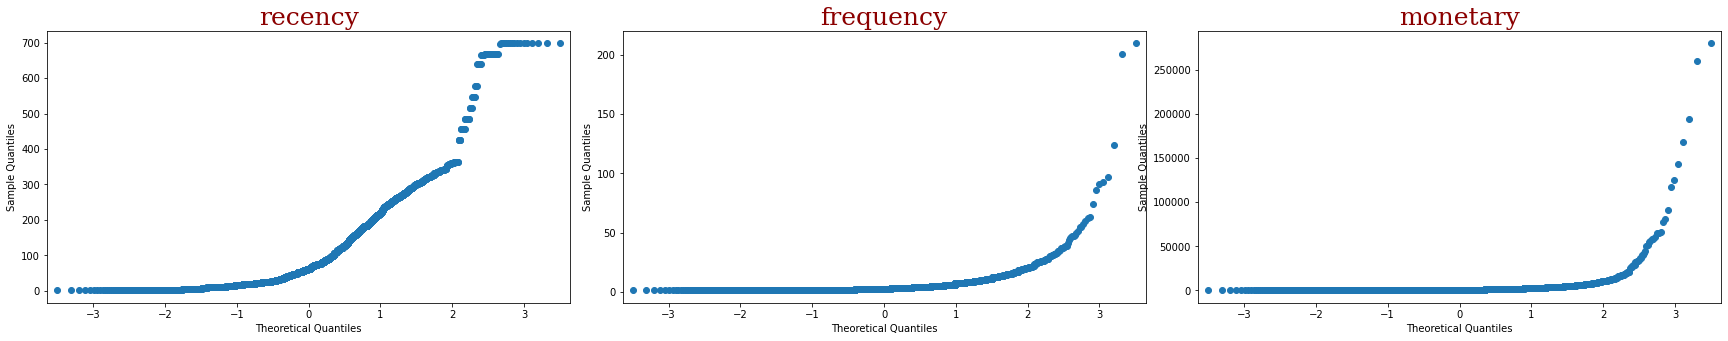

In [34]:
features = customer_history_df.columns[1:]
fig,axes = plt.subplots(1,3,figsize=(30,5))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
axes = axes.ravel()
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
for i,col in enumerate(features):
    sm.qqplot(customer_history_df[col],ax=axes[i])
    axes[i].set_title(col,fontdict = font, fontsize=25)

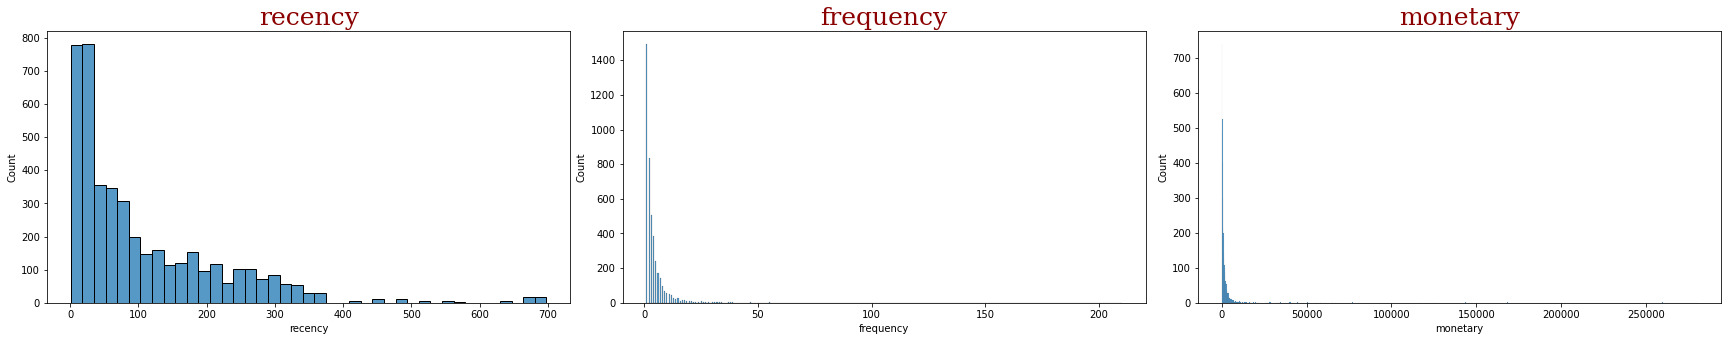

In [35]:
features = customer_history_df.columns[1:]
fig,axes = plt.subplots(1,3,figsize=(30,5))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
axes = axes.ravel()
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
for i,col in enumerate(features):
    sns.histplot(customer_history_df[col],ax=axes[i])
    axes[i].set_title(col,fontdict = font, fontsize=25)

All the variables are verry much positively skewed so use log transformation

In [36]:
df_new = customer_history_df.copy()
df_new['recency']=df_new.recency.apply(lambda x: math.log(x+1,math.exp(1)))
df_new['frequency']=df_new.frequency.apply(lambda x: math.log(x+1,math.exp(1)))
df_new['monetary']=df_new.monetary.apply(lambda x: math.log(x+1,math.exp(1)))
df_new.head()

,CustomerID,recency,frequency,monetary
0,12346,5.793014,0.693147,11.253955
1,12347,3.737670,2.079442,8.368925
2,12348,4.356709,1.609438,7.494564
3,12349,3.044522,0.693147,7.472245
4,12350,5.746203,0.693147,5.815324


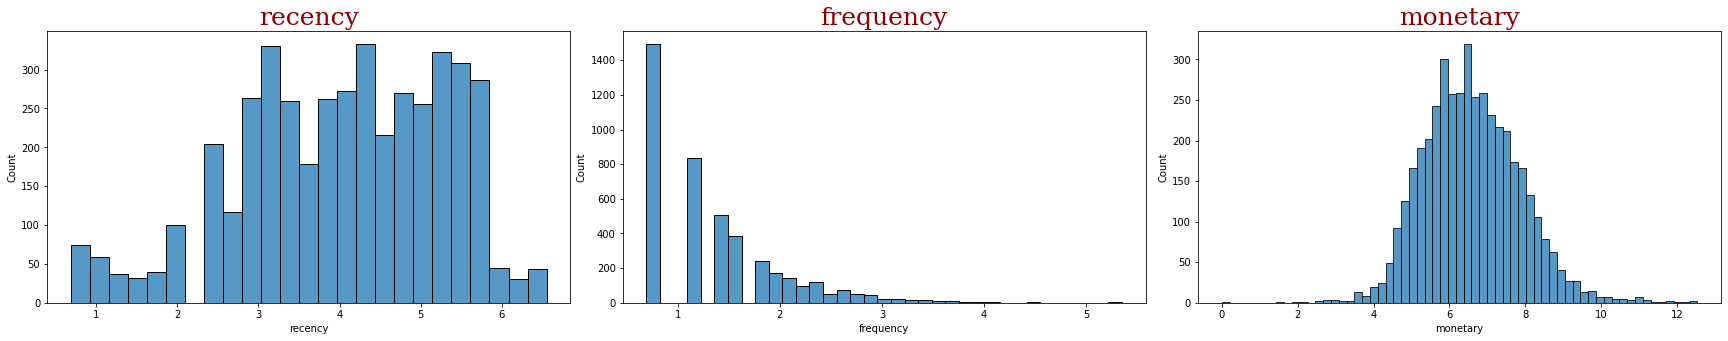

In [37]:
features = df_new.columns[1:]
fig,axes = plt.subplots(1,3,figsize=(30,5))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
axes = axes.ravel()
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
for i,col in enumerate(features):
    sns.histplot(df_new[col],ax=axes[i])
    axes[i].set_title(col,fontdict = font, fontsize=25)

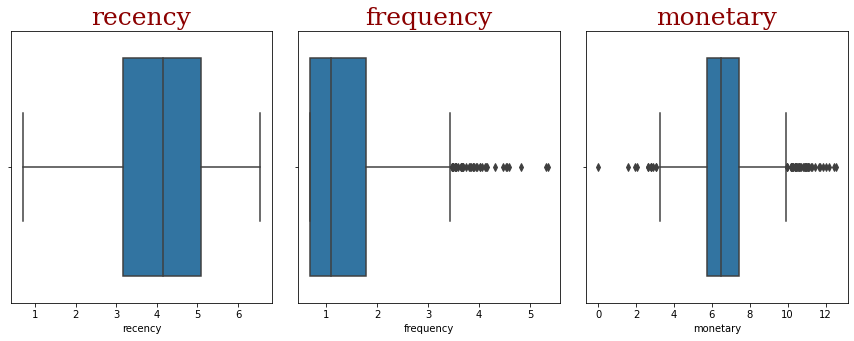

In [38]:
features = df_new.columns[1:]
fig,axes = plt.subplots(1,3,figsize=(15,5))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
axes = axes.ravel()
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
for i,col in enumerate(features):
    sns.boxplot(df_new[col],ax=axes[i])
    axes[i].set_title(col,fontdict = font, fontsize=25)

<IPython.core.display.Javascript object>


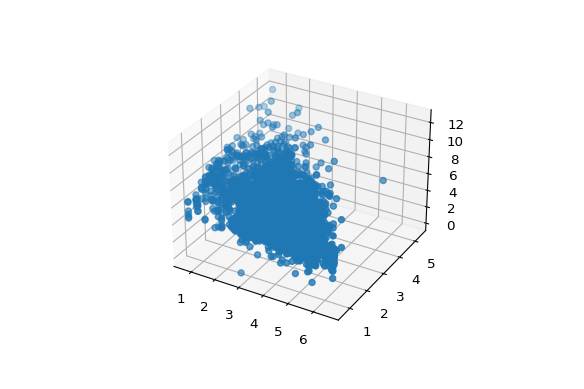

In [39]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter3D(df_new['recency'],df_new['frequency'],df_new['monetary'])


## K-means

In [40]:
df_new

,CustomerID,recency,frequency,monetary
0,12346,5.793014,0.693147,11.253955
1,12347,3.737670,2.079442,8.368925
2,12348,4.356709,1.609438,7.494564
3,12349,3.044522,0.693147,7.472245
4,12350,5.746203,0.693147,5.815324
...,...,...,...,...
4334,18280,5.087596,0.693147,5.201806
4335,18281,1.791759,0.693147,4.404522
4336,18282,5.384495,1.098612,5.187665
4337,18283,2.484907,2.833213,7.623901


In [41]:
wcss=[]
for k in range (1, 10):
  model = KMeans(n_clusters=k, init='k-means++',random_state=0)
  model.fit(df_new[['recency','frequency','monetary']])
  wcss.append(model.inertia_)

<IPython.core.display.Javascript object>


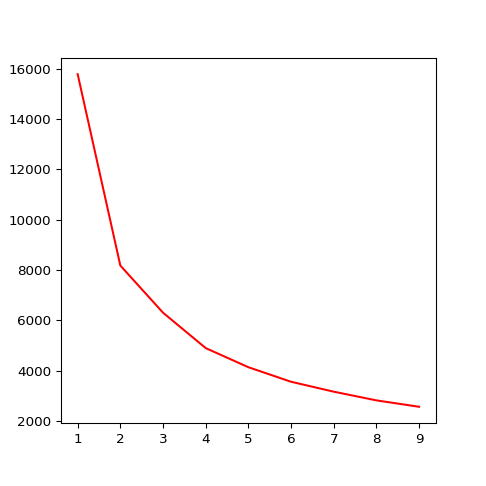

In [42]:
plt.figure(figsize=(5, 5))
plt.plot(range (1, 10), wcss, c='red')
plt.show()

#### silhouette on df_new

In [43]:
SK = range(2,10)
sil_score = []
for i in SK:
    labels=KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_new[['recency','frequency','monetary']]).labels_
    score = metrics.silhouette_score(df_new[['recency','frequency','monetary']],labels,metric="euclidean")
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_new[['recency','frequency','monetary']],labels,metric="euclidean")))

Silhouette score for k(clusters) = 2 is 0.4157052438739113
Silhouette score for k(clusters) = 3 is 0.3206343812641666
Silhouette score for k(clusters) = 4 is 0.33846700559131193
Silhouette score for k(clusters) = 5 is 0.32987878792085085
Silhouette score for k(clusters) = 6 is 0.31071749655547787
Silhouette score for k(clusters) = 7 is 0.30702029699993866
Silhouette score for k(clusters) = 8 is 0.3086320945069649
Silhouette score for k(clusters) = 9 is 0.3064849154621169


In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

<IPython.core.display.Javascript object>


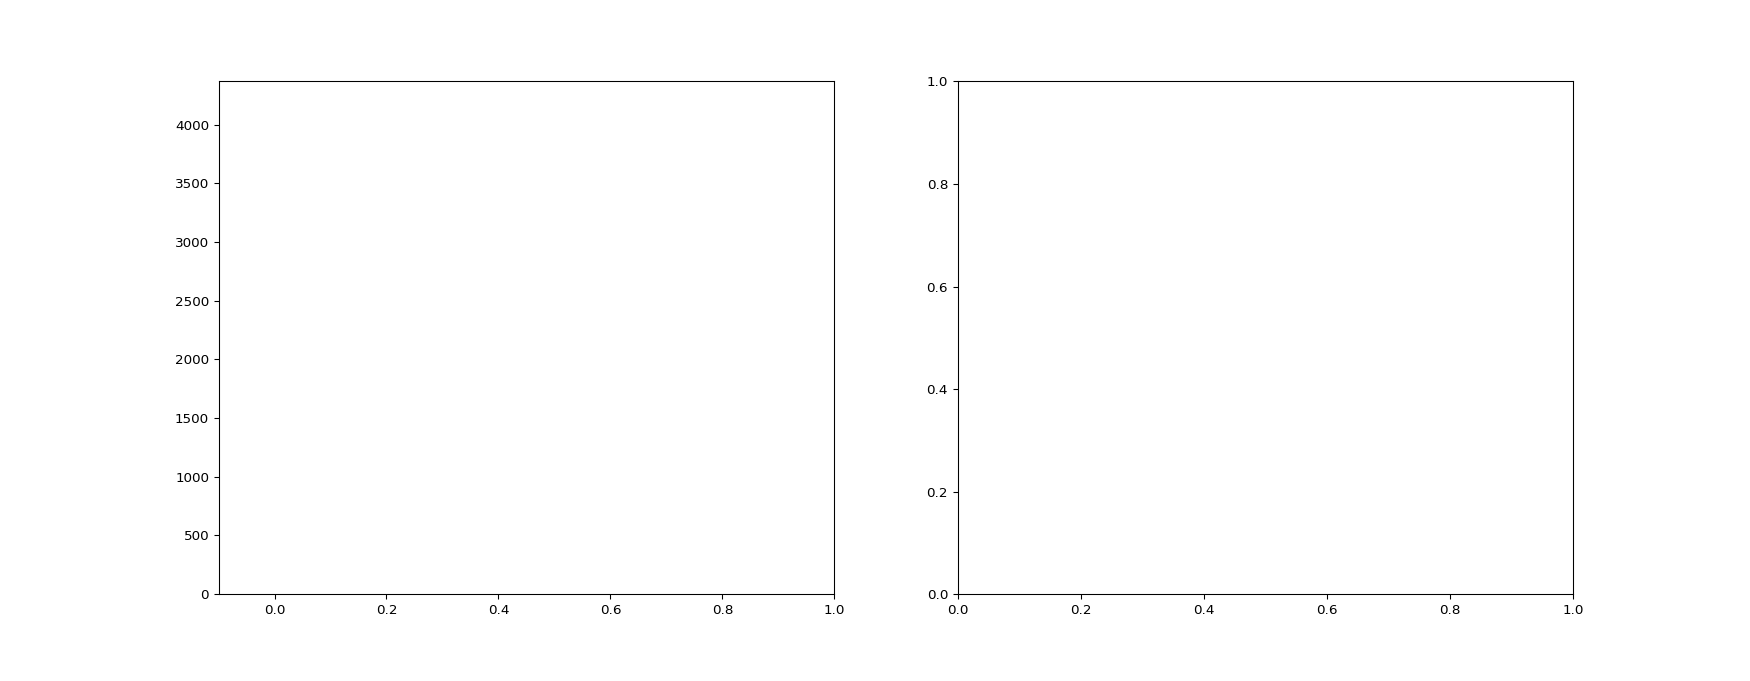

TypeError: '<=' not supported between instances of 'str' and 'int'

In [45]:

X=df_new[['recency','frequency','monetary']]
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Just Assume 4 clusters

In [46]:
clusterer = KMeans(n_clusters=4, n_init="auto", random_state=10)
cluster_labels = clusterer.fit_predict(df_new[['recency','frequency','monetary']])
customer_history_df['Cluster']=cluster_labels

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
cluster_1=customer_history_df[customer_history_df.Cluster==0]
cluster_2=customer_history_df[customer_history_df.Cluster==1]
cluster_3=customer_history_df[customer_history_df.Cluster==2]
cluster_4=customer_history_df[customer_history_df.Cluster==3]

In [ ]:
cluster_1[['recency','frequency',	'monetary']].describe()

In [ ]:
cluster_2[['recency','frequency',	'monetary']].describe()

In [ ]:
cluster_3[['recency','frequency',	'monetary']].describe()

In [ ]:
cluster_4[['recency','frequency',	'monetary']].describe()

### Just Assume 2 clusters

In [ ]:
clusterer = KMeans(n_clusters=2, n_init="auto", random_state=10)
cluster_labels = clusterer.fit_predict(df_new[['recency','frequency','monetary']])
df_new['Cluster']=cluster_labels
df_new

In [ ]:
cluster_1=customer_history_df[customer_history_df.Cluster==0]
cluster_2=customer_history_df[customer_history_df.Cluster==1]

In [ ]:
cluster_1[['recency','frequency',	'monetary']].describe()

In [ ]:
cluster_2[['recency','frequency',	'monetary']].describe()

### Hierarchical clustering

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(df_new[['recency','frequency','monetary']], method = 'complete'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=60, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line